## Question 1
The following table indicates the number of 6-point scores in an American rugby match in the 1979 season.

![](table1.png)

Based on these results, we create a Poisson distribution with the sample mean parameter  = 2.435. Is there any reason to believe that at a .05 level the number of scores is a Poisson variable?

Check [here](https://www.geeksforgeeks.org/how-to-create-a-poisson-probability-mass-function-plot-in-python/) how to create a poisson distribution and how to calculate the expected observations, using the probability mass function (pmf). 
A Poisson distribution is a discrete probability distribution. It gives the probability of an event happening a certain number of times (k) within a given interval of time or space. The Poisson distribution has only one parameter, λ (lambda), which is the mean number of events.

In [22]:
# your answer here
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

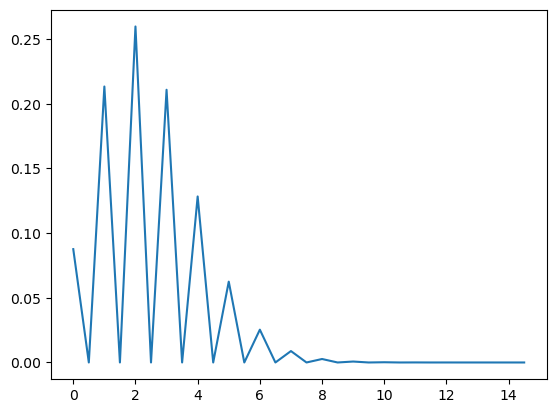

In [23]:
 # creating a numpy array for x-axis
x = np.arange(0, 15, 0.5)
 
# poisson distribution data for y-axis
y = stats.poisson.pmf(x, mu=2.435)
 
plt.plot(x, y)
plt.show()

In [24]:
O = np.array([35, 99, 104, 110, 62, 25, 10, 3])

# Mean parameter of the sample and lambda in the Poisson distribution
lambda_value = 2.435

# Calculation using the Poisson PMF formula
E = np.array([stats.poisson.pmf(k, lambda_value) * sum(O) for k in range(len(O))])

# Scaling the expected frequencies to match the total sum of observed frequencies
# I introduced this passage after encountering a ValueError by applying the stats.chisquare function 
# (for the function to work the sum of the expexted frequencies must match the sum of the observed frequency 
# and without scaling the values of expected frequencies this condition was not satisfied).
E *= np.sum(O) / np.sum(E)

print(E)

[ 39.38705697  95.90748373 116.76736144  94.77617503  57.69499655
  28.09746332  11.4028872    3.96657576]


In [25]:
O = np.array([35, 99, 104, 110, 62, 25, 10, 3])
E = np.array([39.38705697, 95.90748373, 116.76736144, 94.77617503, 57.69499655, 28.09746332, 11.4028872, 3.96657576])

In [26]:
# Compute statistic for chi2
print(np.square(O-E) / E)
statistic = (np.square(O-E) / E).sum()
statistic

[0.4886445  0.09971752 1.39598528 2.44539144 0.32122464 0.34146424
 0.17259598 0.23553532]


5.500558934530607

In [27]:
# Calculate p-value
dof = 7
stats.chi2.sf(abs(statistic), dof)

0.5991164534017539

In [28]:
stats.chisquare(f_obs=O, f_exp=E)

Power_divergenceResult(statistic=5.500558934530607, pvalue=0.5991164534017539)

In [29]:
# Looking at the pvalue, we cannot confute the hypothesis that the variables follow a Poisson distribution. 
# So the null hypothesis that they do follow the Poisson distribution is still believable.

## Question 2
A researcher gathers information about the patterns of Physical Activity of children in the fifth grade of primary school of a public school. He defines three categories of physical activity (Low, Medium, High). He also inquires about the regular consumption of sugary drinks at school, and defines two categories (Yes = consumed, No = not consumed). We would like to evaluate if there is an association between patterns of physical activity and the consumption of sugary drinks for the children of this school, at a level of 5% significance. The results are in the following table: 

![](table4.png)

In [30]:
#your answer here
sugary_drinks_table=[[32,12],
                     [14,22],
                     [6,9]]

In [31]:
# Contingency tables and independence of effects
stats.chi2_contingency(np.array(sugary_drinks_table)) 

Chi2ContingencyResult(statistic=10.712198008709638, pvalue=0.004719280137040844, dof=2, expected_freq=array([[24.08421053, 19.91578947],
       [19.70526316, 16.29473684],
       [ 8.21052632,  6.78947368]]))

In [32]:
# Null hypothesis: the consumption of sugary drinks and physical activity are not associated.
# test hypothesis: the consumption of sugary drinks and physical activity are associated (as in the first influences the second).
# pvalue in the chi-square test is lower than 0.05, so we can reject the null hypothesis and state that there is a correlation betwwen the categorical variables od sugary consumption or NO sugary consumtion.

In [33]:
stats.chi2_contingency(np.array(sugary_drinks_table), lambda_='log-likelihood') 

Chi2ContingencyResult(statistic=10.975981909150999, pvalue=0.004136145536821807, dof=2, expected_freq=array([[24.08421053, 19.91578947],
       [19.70526316, 16.29473684],
       [ 8.21052632,  6.78947368]]))

In [ ]:
# the G-test gives the same result as the Chi-squared-test.